In [1]:
#IMPORT STATEMENTS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **LOAD THE DATASET**

In [2]:
df = pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv", encoding='latin1')
# encoding=latin1 is used to resolve error
#UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 606-607: invalid continuation byte

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# **1) Data Cleaning**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


# **Delete Unwanted Columns**

In [5]:
# Delete last three cloumns as they dont contribute much
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [6]:
df.head(2)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


# **Rename the columns**

In [7]:
df.columns=["target","sms"]

In [8]:
df.head(2)

,target,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


# **Changing the target values to number**

In [9]:
df["target"].replace("ham",0,inplace=True)
df["target"].replace("spam",1,inplace=True)

/tmp/ipykernel_33/1739206971.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["target"].replace("ham",0,inplace=True)
/tmp/ipykernel_33/1739206971.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

In [10]:
df.head(2)

,target,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...


# **Check Null Values**

In [11]:
df.isnull().sum()

target    0
sms       0
dtype: int64

# **Check for Duplicate Values**

In [12]:
df.duplicated().sum()

403

In [13]:
len(df)

5572

In [14]:
#remove duplicates
df=df.drop_duplicates()
df.shape

(5169, 2)

# **2) EDA [Exploratory Data Analysis]**

**Check the ratio of Spam and Ham messages**

In [15]:
df["target"].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

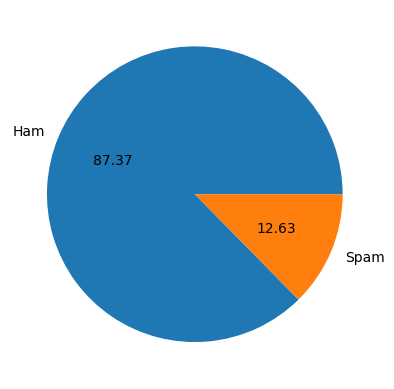

In [16]:
plt.pie(df["target"].value_counts(),labels=["Ham","Spam"],autopct="%.2f")
plt.show()

We can observe that the data is imbalanced

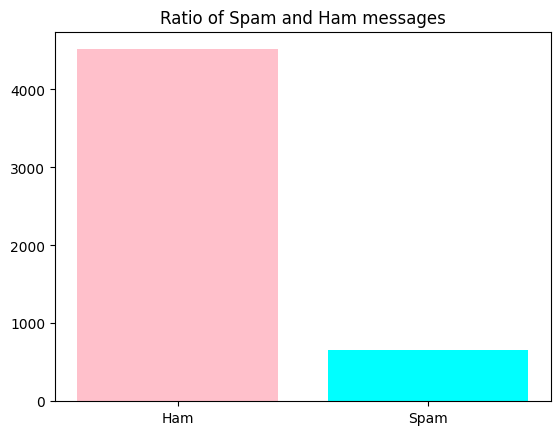

In [17]:
X=["Ham","Spam"]
Y=df["target"].value_counts()
plt.bar(X,Y,color=["pink","cyan"])
plt.title("Ratio of Spam and Ham messages")
plt.show()

**Word Cloud to check the word with max frequency that appears in Spam**

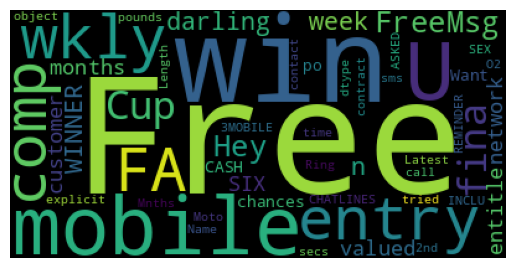

In [18]:
from wordcloud import WordCloud
text=str(df[df["target"]==1]["sms"])

# Generate a word cloud
wordcloud = WordCloud().generate(text)

# Display the word cloud
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


# **2) Data Preprocessing**

In [19]:
# REMOVE URL's.
import re
def remove_urls(text):
    return re.sub(r'http\S+', '', text)

In [20]:
#REMOVE PUNCTUATIONS
import re

def remove_punctuations(text):
    text=re.sub(r"[^A-Za-z0-9\s]","",text)
    return text
    

In [21]:
#REMOVE STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def remove_stopword(text):
    stop_words = stopwords.words('english')  # Specify 'english' for English stopwords
    temp_text = word_tokenize(text)

    for word in temp_text:
        if word in stop_words:
            text=text.replace(word,"")
    return text

In [22]:
from nltk.stem import PorterStemmer
def Stemming(text):
    ps = PorterStemmer()
    tokens = word_tokenize(text)
    stemmed_words = []
    for token in tokens:
        stemmed_token = ps.stem(token)
        stemmed_words.append(stemmed_token)
    return ' '.join(stemmed_words)

In [23]:
def transform(text):
    text=text.lower()
    text=remove_urls(text)
    text=remove_punctuations(text)
    text=remove_stopword(text)
    text=Stemming(text)

    return text

    

In [24]:
df["transformed"]=df["sms"].apply(transform)
df.head(2)

,target,sms,transformed
0,0,"Go until jurong point, crazy.. Available only ...",go jurong pot crazi avail bugi n great world l...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni


# **Text Vectorization**

In [25]:
#Bag of words
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
X=cv.fit_transform(df["transformed"]).toarray() 
#0.99 precison   but is it is classifying 20 spam as not spam(False Negative)

In [26]:
#TF IDF

from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
X=tf.fit_transform(df["transformed"]).toarray()

#NO False Negative

In [27]:
import joblib
joblib.dump(tf,"tfidf_vectorizer.pkl")

['tfidf_vectorizer.pkl']

In [28]:
Y=df["target"]

In [29]:
X.shape

(5169, 9720)

# **Splitting**

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=0)

In [31]:
print(len(X_train))
print(len(X_test))

4135
1034


# **MODEL BUILDING**

In [32]:
from sklearn.naive_bayes import MultinomialNB

mnb_model=MultinomialNB()
mnb_model.fit(X_train,Y_train)

MultinomialNB()

In [33]:
from sklearn.naive_bayes import GaussianNB
gnb_model=GaussianNB()
gnb_model.fit(X_train,Y_train)

GaussianNB()

In [34]:
from sklearn.naive_bayes import BernoulliNB
bnb_model=BernoulliNB()
bnb_model.fit(X_train,Y_train)

BernoulliNB()

# **EVALUATION**

In [35]:
#since data is not balanced, we will not rely on just accuracy, precision would be a better metric
from sklearn.metrics import precision_score
Y_pred=bnb_model.predict(X_test)
precision=precision_score(Y_test,Y_pred)
print(precision)


0.9734513274336283


# **CONFUSION MATRIX**

Bernoulli

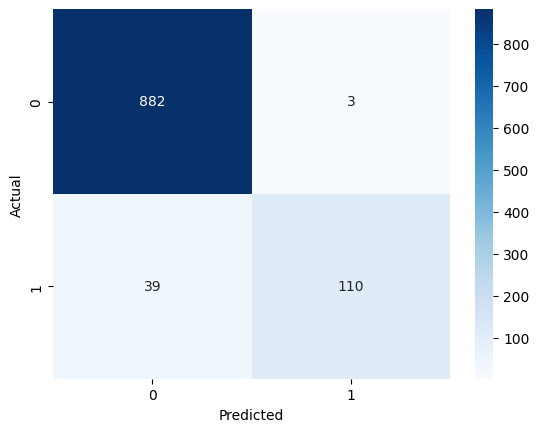

In [36]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Multinomial

In [37]:
#since data is not balanced, we will not rely on just accuracy, precision would be a better metric
from sklearn.metrics import precision_score
Y_pred=mnb_model.predict(X_test)
precision=precision_score(Y_test,Y_pred)
print(precision)# precision=1 means False positive=0


1.0


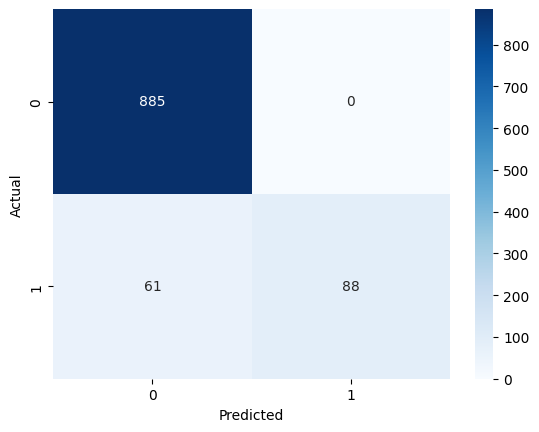

In [38]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Save the model

In [39]:
import joblib
joblib.dump(bnb_model,"saved_model.pkl")

['saved_model.pkl']

In [40]:
import joblib
joblib.dump(mnb_model,"MNB_model.pkl")

['MNB_model.pkl']